# k-Means Clustering

## Introduction

K-means clustering is an unsupervised machine learning technique used for grouping data points into clusters based on proximity. Unlike supervised learning where we have labeled examples, clustering helps us discover hidden patterns in data without knowing the "right answers" beforehand.

This technique is widely used in business applications such as:
- **Customer segmentation**: Grouping customers with similar purchasing behaviors
- **Market research**: Identifying distinct customer groups
- **Image compression**: Reducing file sizes by grouping similar colors
- **Anomaly detection**: Finding unusual patterns in data

## The Dataset

For this demonstration, we'll use the **Wine Dataset**, which contains chemical analysis results from wines grown in Italy. The dataset includes 13 different chemical measurements (features) from 178 wine samples.

While this dataset originally has labels (three different wine cultivars), we'll use it to demonstrate clustering. This allows us to compare how well k-means discovers the natural groupings compared to the actual wine types.

In [11]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the Wine dataset
from sklearn.datasets import load_wine

# For clustering and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler

# Suppress warnings
from warnings import filterwarnings
filterwarnings("ignore", category=FutureWarning, module="sklearn")

### Loading and Preparing the Data

Let's load the wine dataset and prepare it for clustering. We'll use all 13 features, but we'll need to standardize them first since k-means is sensitive to the scale of features. 

In [12]:
# Load the wine dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target  # True labels (for comparison later)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"True number of wine types: {len(np.unique(y))}")

Dataset shape: (178, 13)
Number of features: 13
Number of samples: 178
True number of wine types: 3


## How K-Means Works

K-means clustering follows a simple but effective process to group similar data points together. Here's how it works:

### Step 1: Initialize Centroids

The algorithm starts by randomly placing **k** cluster centers (called centroids) in the data space. The number **k** represents how many clusters we want to find.

### Step 2: Assign Points to Nearest Centroid

Each data point is assigned to the cluster whose centroid is closest to it. This creates an initial grouping of the data.

### Step 3: Update Centroids

The algorithm calculates the mean (average) position of all points in each cluster and moves the centroid to that position.

### Step 4: Repeat Until Convergence

Steps 2 and 3 are repeated until the centroids stop moving (or move very little). At this point, the algorithm has converged and we have our final clusters.

### Key Concept: Within-Cluster Variance

K-means aims to minimize the **within-cluster variance** - meaning it tries to make points within each cluster as similar as possible, while keeping clusters as different as possible from each other. 

In [13]:
# Example: Apply k-means with k=3 (we'll learn how to choose k later)
kmeans_example = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans_example.fit_predict(X_scaled)

print(f"Cluster labels assigned: {np.unique(cluster_labels)}")
print(f"Number of points in each cluster: {np.bincount(cluster_labels)}")

Cluster labels assigned: [0 1 2]
Number of points in each cluster: [65 51 62]


### Visualizing the Clusters

Since our dataset has 13 features, we can't visualize it directly in 2D. However, we can use a technique called **Principal Component Analysis (PCA)** to reduce the dimensions to 2D for visualization purposes. This helps us see how the clusters are distributed. 

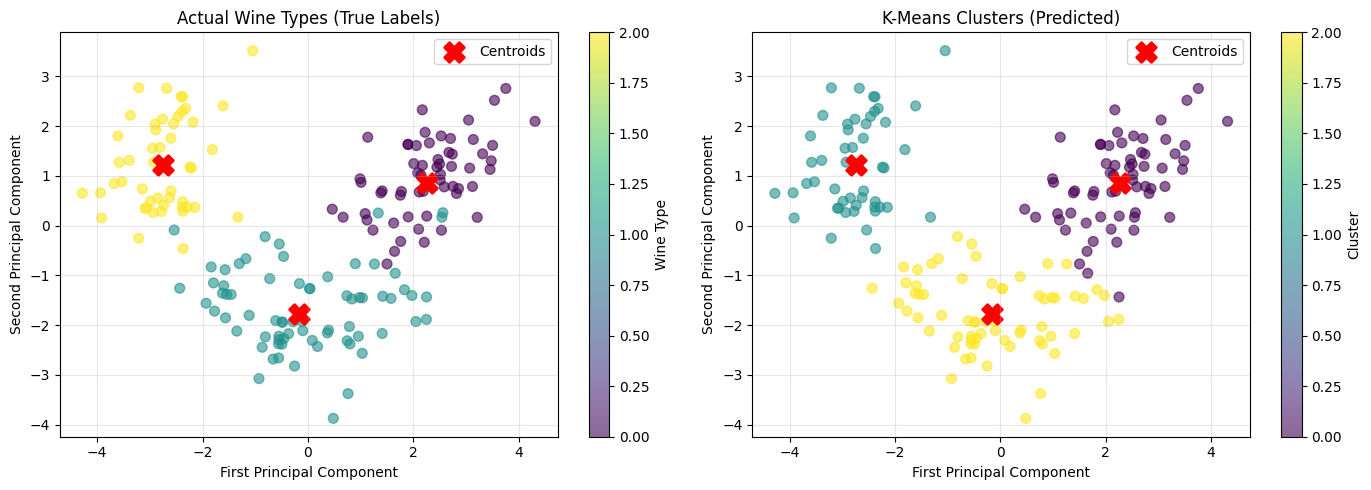

In [14]:
# Use PCA to reduce to 2D for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)

# Apply k-means to the 2D representation for visualization
kmeans_2d = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_2d = kmeans_2d.fit_predict(X_2d)

# Visualize
plt.figure(figsize=(14, 5))

# Plot 1: Actual wine types
plt.subplot(121)
scatter1 = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', alpha=0.6, s=50)
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], 
           s=200, c='red', marker='X', label='Centroids', linewidths=2)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Actual Wine Types (True Labels)')
plt.colorbar(scatter1, label='Wine Type')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: K-means clusters
plt.subplot(122)
scatter2 = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_2d, cmap='viridis', alpha=0.6, s=50)
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], 
           s=200, c='red', marker='X', label='Centroids', linewidths=2)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clusters (Predicted)')
plt.colorbar(scatter2, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Comparing Actual vs Predicted

Notice that k-means found clusters, but the cluster labels (0, 1, 2) don't necessarily match the true wine type labels. This is normal in unsupervised learning - the algorithm discovers patterns without knowing the "correct" labels.

Let's see how well our clusters match the actual wine types:

Adjusted Rand Index: 0.897

This score measures how well the clusters match the true labels.
A score of 1.0 means perfect agreement, 0.0 means random clustering.


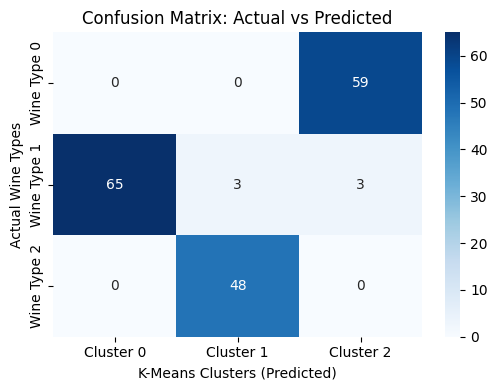

In [15]:
# Compare actual vs predicted clusters
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y, cluster_labels)

# Visualize
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=['Wine Type 0', 'Wine Type 1', 'Wine Type 2'])
plt.xlabel('K-Means Clusters (Predicted)')
plt.ylabel('Actual Wine Types')
plt.title('Confusion Matrix: Actual vs Predicted')

# Calculate Adjusted Rand Index
ari = adjusted_rand_score(y, cluster_labels)
print(f"Adjusted Rand Index: {ari:.3f}")
print("\nThis score measures how well the clusters match the true labels.")
print("A score of 1.0 means perfect agreement, 0.0 means random clustering.")

plt.tight_layout()
plt.show()

## But How Many Clusters?

One of the biggest challenges in k-means clustering is determining the **optimal number of clusters (k)**. 

### The Problem

In real-world scenarios, we often don't know how many clusters exist in our data. Choosing the wrong number of clusters can lead to:
- **Too few clusters**: Important distinctions are lost
- **Too many clusters**: Artificial divisions that don't represent real patterns

### Why This Matters

The number of clusters is a **hyperparameter** - a setting we must choose before running the algorithm. Unlike supervised learning where we can validate on test data, in unsupervised learning we need other methods to guide our choice.

In the following sections, we'll explore two practical methods for choosing k:
1. **The Elbow Method** - A visual heuristic
2. **The Silhouette Score** - A quantitative measure


## The Elbow Method

The Elbow Method is a visual technique for determining the optimal number of clusters. It's called the "elbow" method because the graph often has a bend that looks like an elbow.

### How It Works

1. Run k-means for different values of k (e.g., k=1, 2, 3, ..., 10)
2. For each k, calculate the **within-cluster sum of squares (WCSS)** - also called "inertia"
3. Plot k against WCSS
4. Look for the "elbow" - the point where adding more clusters doesn't significantly reduce WCSS

### Business Interpretation

The elbow represents the point of diminishing returns. Before the elbow, adding clusters significantly improves the grouping. After the elbow, additional clusters provide little benefit and may just be splitting natural groups unnecessarily.


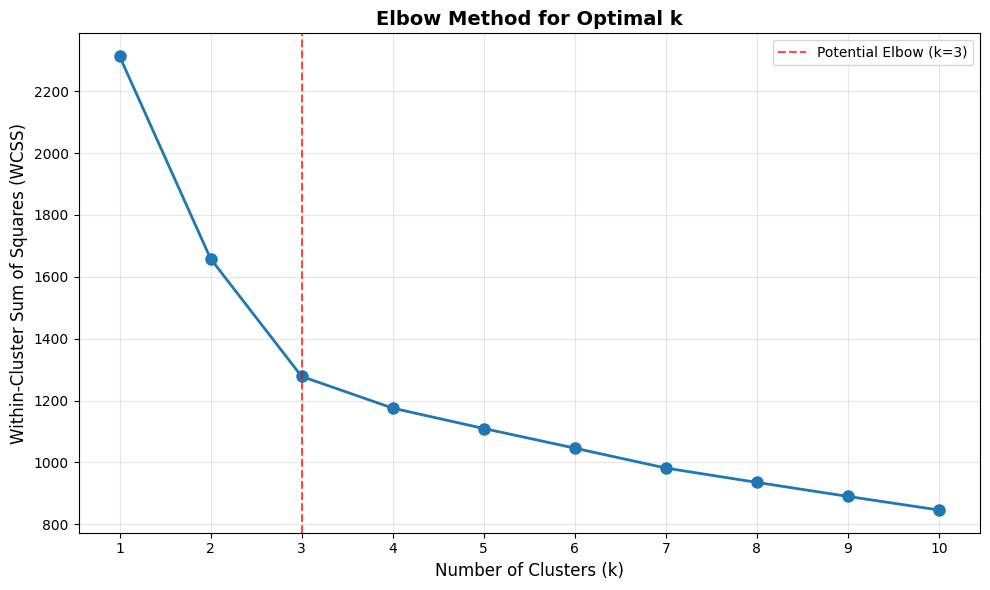

The 'elbow' appears around k=3, suggesting this might be the optimal number of clusters.


In [16]:
# Calculate WCSS for different values of k
k_range = range(1, 11)
wcss = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

# Highlight the elbow (typically around k=3 for this dataset)
plt.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='Potential Elbow (k=3)')
plt.legend()

plt.tight_layout()
plt.show()

print("The 'elbow' appears around k=3, suggesting this might be the optimal number of clusters.")


### Understanding the Elbow Plot

- **Steep decline (k=1 to k=3)**: Each additional cluster significantly improves the grouping
- **Gentle decline (k=4+)**: Additional clusters provide diminishing returns
- **The elbow (k=3)**: The "sweet spot" where we get good clustering without over-complicating

### Limitations of the Elbow Method

The elbow isn't always clear-cut. Sometimes:
- The curve is smooth with no obvious elbow
- Multiple elbows appear
- The optimal k depends on business context

That's why we also use the Silhouette Score for validation.


## The Silhouette Score

The Silhouette Score provides a quantitative measure of clustering quality. Unlike the Elbow Method, it doesn't require visual interpretation - it gives you a number.

**Note**: The Silhouette Score requires at least 2 clusters to work (you can't measure separation with only one cluster). So when we calculate silhouette scores, we start from k=2.

### How It Works

For each data point, the Silhouette Score measures:
- **Cohesion**: How similar the point is to other points in its own cluster
- **Separation**: How different the point is from points in the nearest other cluster

### Score Interpretation

The Silhouette Score ranges from **-1 to 1**:
- **+1**: Perfect clustering - points are very close to their cluster and far from others
- **0**: Overlapping clusters - points are equally close to multiple clusters
- **-1**: Poor clustering - points might be assigned to the wrong cluster

### Business Value

A high Silhouette Score indicates that:
- Customers/products within a cluster are very similar (good for targeted marketing)
- Clusters are well-separated (clear distinctions between groups)
- The clustering solution is reliable and meaningful


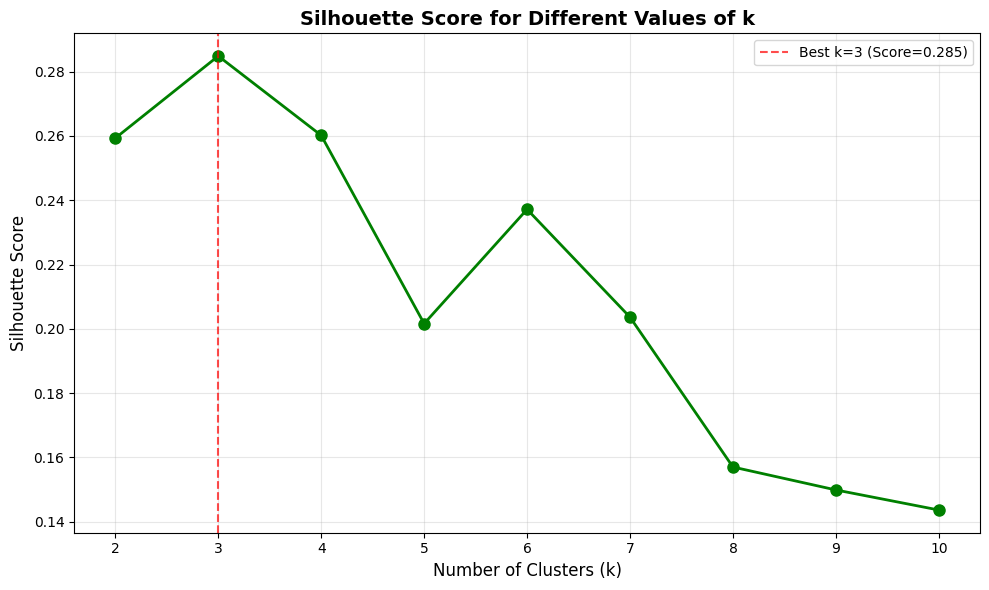

Optimal number of clusters based on Silhouette Score: k=3
Best Silhouette Score: 0.285


In [17]:
# Calculate Silhouette Scores for different values of k
# Note: Silhouette score requires at least 2 clusters, so we start from k=2
silhouette_scores = []
k_range_silhouette = range(2, 11)  # Start from k=2

for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores, marker='o', linewidth=2, markersize=8, color='green')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score for Different Values of k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range_silhouette)

# Highlight the best score
best_k = k_range_silhouette[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, 
           label=f'Best k={best_k} (Score={best_score:.3f})')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Optimal number of clusters based on Silhouette Score: k={best_k}")
print(f"Best Silhouette Score: {best_score:.3f}")


### Detailed Silhouette Analysis

Let's visualize the Silhouette Score for each point when using k=3. This helps us understand:
- Which points are well-clustered (high scores)
- Which points are ambiguous (low scores)
- The overall quality of each cluster


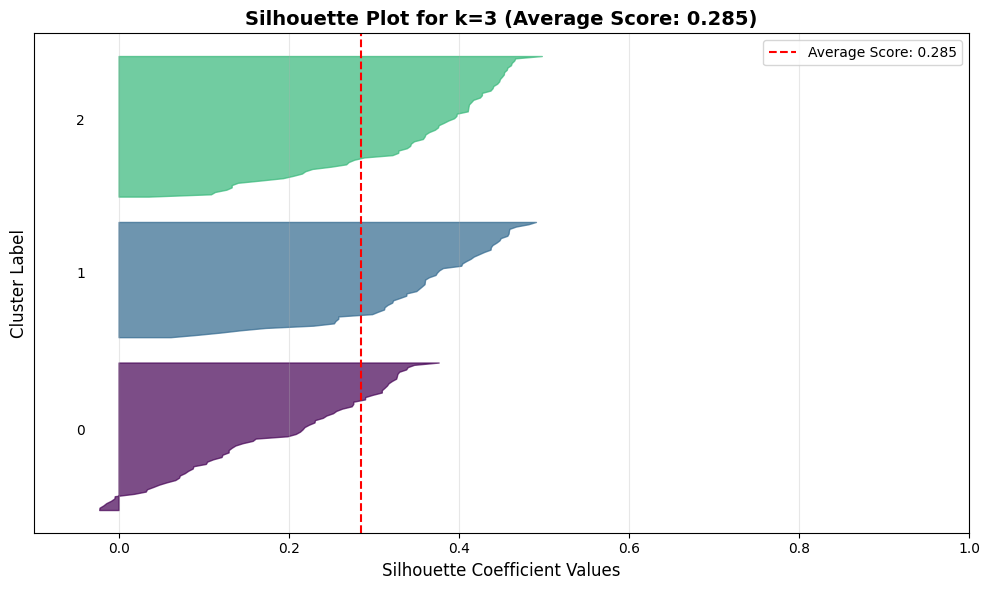

Each colored area represents one cluster.
Wider areas = better clustering (points are well-assigned to their cluster)
Narrow areas = ambiguous points (might belong to multiple clusters)


In [18]:
# Detailed silhouette plot for k=3
from sklearn.metrics import silhouette_samples

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Create silhouette plot
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10

for i in range(k):
    # Aggregate silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.viridis(float(i) / k)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10

ax.set_xlabel('Silhouette Coefficient Values', fontsize=12)
ax.set_ylabel('Cluster Label', fontsize=12)
ax.set_title(f'Silhouette Plot for k={k} (Average Score: {silhouette_avg:.3f})', 
             fontsize=14, fontweight='bold')

# The vertical line for average silhouette score
ax.axvline(x=silhouette_avg, color="red", linestyle="--", 
          label=f'Average Score: {silhouette_avg:.3f}')
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Each colored area represents one cluster.")
print("Wider areas = better clustering (points are well-assigned to their cluster)")
print("Narrow areas = ambiguous points (might belong to multiple clusters)")


## Choosing K in Practice

In real-world business scenarios, you rarely rely on just one method. Instead, you combine multiple approaches and consider business context.

### Comparing Both Methods

Let's visualize both the Elbow Method and Silhouette Score together to see how they compare:


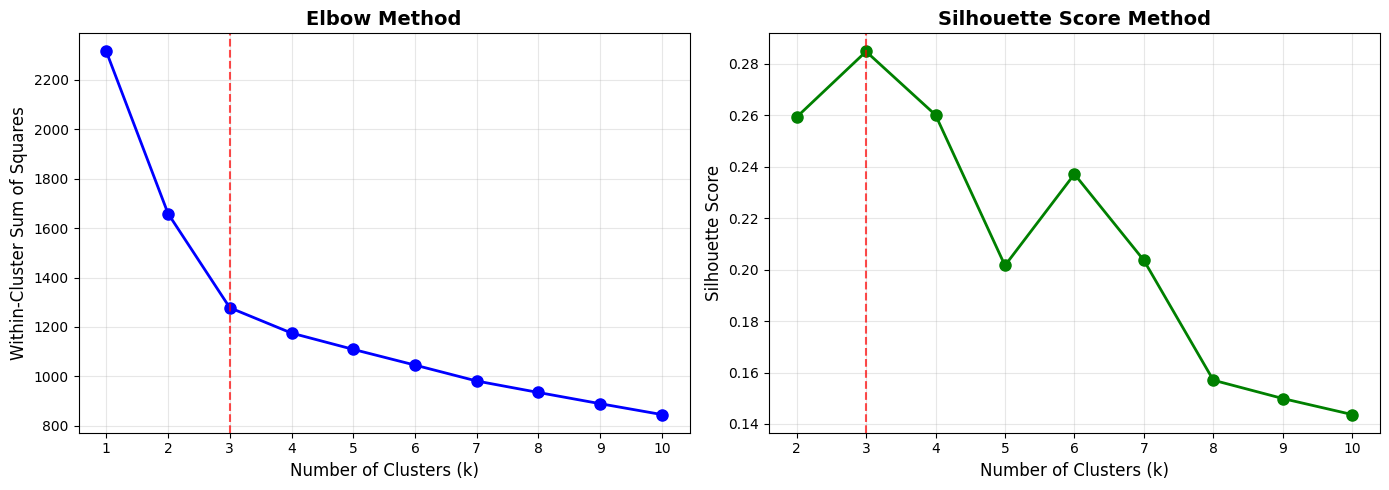

Both methods suggest k=3 as optimal for this dataset!
True number of wine types: 3
Elbow method suggests: k=3
Silhouette method suggests: k=3


In [19]:
# Create a comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method
ax1.plot(k_range, wcss, marker='o', linewidth=2, markersize=8, color='blue')
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Within-Cluster Sum of Squares', fontsize=12)
ax1.set_title('Elbow Method', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_range)
ax1.axvline(x=3, color='red', linestyle='--', alpha=0.7)

# Silhouette Score (note: starts from k=2)
ax2.plot(k_range_silhouette, silhouette_scores, marker='o', linewidth=2, markersize=8, color='green')
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score Method', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(k_range_silhouette)
ax2.axvline(x=best_k, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("Both methods suggest k=3 as optimal for this dataset!")
print(f"True number of wine types: {len(np.unique(y))}")
print(f"Elbow method suggests: k=3")
print(f"Silhouette method suggests: k={best_k}")


### Real-World Decision Making Process

When choosing k in practice, data scientists and business analysts follow this process:

#### 1. **Start with Domain Knowledge**
   - Do you have business reasons to expect a certain number of clusters?
   - Example: "We know we have three customer segments: budget, mid-range, premium"

#### 2. **Apply the Elbow Method**
   - Get a visual sense of where diminishing returns begin
   - Identify candidate values of k

#### 3. **Validate with Silhouette Score**
   - Confirm which k values produce high-quality clusters
   - Rule out values that create poor separations

#### 4. **Consider Business Constraints**
   - Can you effectively manage 10 customer segments? Probably not.
   - Is 2 clusters too simple? Maybe.
   - Find the balance between statistical quality and practical usability

#### 5. **Test and Iterate**
   - Apply the clustering solution
   - Evaluate if the clusters make business sense
   - Adjust k if needed based on results


### Final Clustering Solution

Let's apply k-means with k=3 (our optimal choice) and examine the final results:


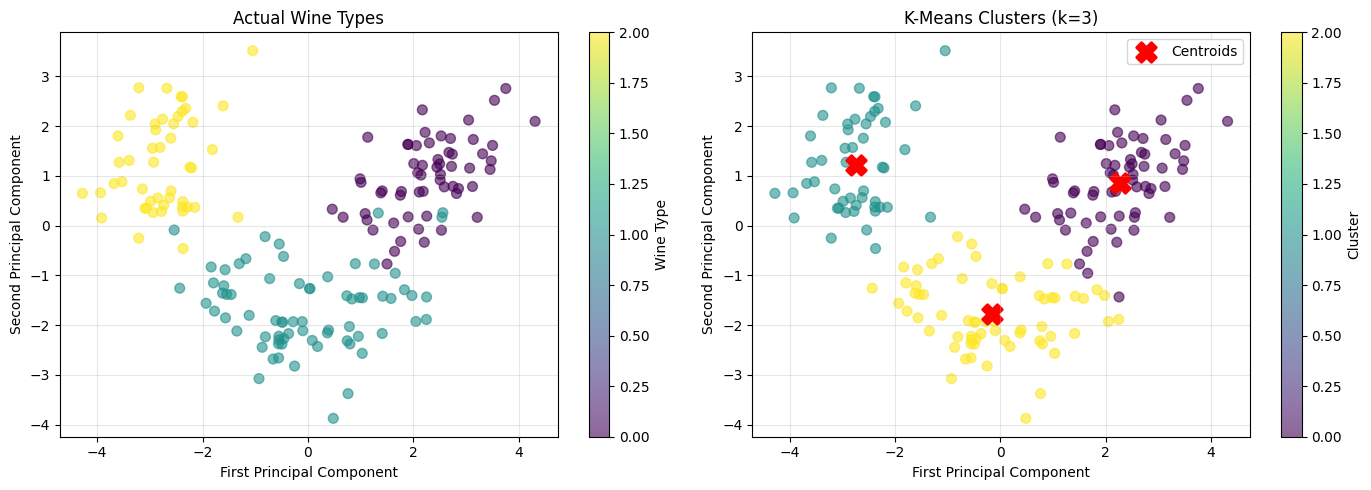

Final Silhouette Score: 0.285
Adjusted Rand Index: 0.897

The Adjusted Rand Index of 0.897 indicates excellent agreement between k-means clusters and actual wine types.


In [20]:
# Final k-means with optimal k=3
final_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(X_scaled)

# Apply k-means to 2D data for visualization
final_kmeans_2d = KMeans(n_clusters=3, random_state=42, n_init=10)
final_labels_2d = final_kmeans_2d.fit_predict(X_2d)

# Calculate final metrics
final_silhouette = silhouette_score(X_scaled, final_labels)
final_ari = adjusted_rand_score(y, final_labels)

# Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Actual wine types
scatter1 = axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', alpha=0.6, s=50)
axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')
axes[0].set_title('Actual Wine Types')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Wine Type')

# K-means clusters
scatter2 = axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=final_labels_2d, cmap='viridis', alpha=0.6, s=50)
axes[1].scatter(final_kmeans_2d.cluster_centers_[:, 0], final_kmeans_2d.cluster_centers_[:, 1], 
               s=200, c='red', marker='X', label='Centroids', linewidths=2)
axes[1].set_xlabel('First Principal Component')
axes[1].set_ylabel('Second Principal Component')
axes[1].set_title('K-Means Clusters (k=3)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()

print(f"Final Silhouette Score: {final_silhouette:.3f}")
print(f"Adjusted Rand Index: {final_ari:.3f}")
print(f"\nThe Adjusted Rand Index of {final_ari:.3f} indicates {'excellent' if final_ari > 0.8 else 'good' if final_ari > 0.5 else 'moderate'} agreement between k-means clusters and actual wine types.")


## Summary

### Key Takeaways

1. **K-means is an iterative algorithm** that groups similar data points together by minimizing within-cluster variance

2. **Choosing k is critical** - too few or too many clusters can lead to poor insights

3. **The Elbow Method** provides a visual way to identify the optimal number of clusters by looking for the "bend" in the WCSS curve

4. **The Silhouette Score** provides a quantitative measure (ranging from -1 to 1) of how well points are clustered

5. **In practice**, combine both methods with business knowledge to make the best decision

### Business Applications

- **Customer Segmentation**: Group customers for targeted marketing campaigns
- **Product Categorization**: Organize products into meaningful groups
- **Anomaly Detection**: Identify unusual patterns that don't fit any cluster
- **Market Research**: Discover hidden patterns in customer behavior

### Remember

K-means clustering is a powerful tool, but it's not magic. Always validate your clusters make business sense and align with domain expertise!
